5.400000000000545
5.400000000000545
2.3999999999991815
2.7000000000002724
3.6000000000008185
3.9000000000005457
3.2999999999997267
3.6000000000008185
2.7000000000002724
2.4000000000005453
3.899999999999181
4.499999999999999
5.100000000000818
4.200000000000273
4.200000000000273
3.6000000000008185
2.9999999999999996
5.400000000000545
3.899999999999181
3.899999999999181
2.7000000000002724
2.4000000000005453
4.200000000000273
4.499999999999999
3.9000000000005457
3.6000000000008185
3.899999999999181
3.2999999999997267
2.4000000000005453
2.9999999999999996


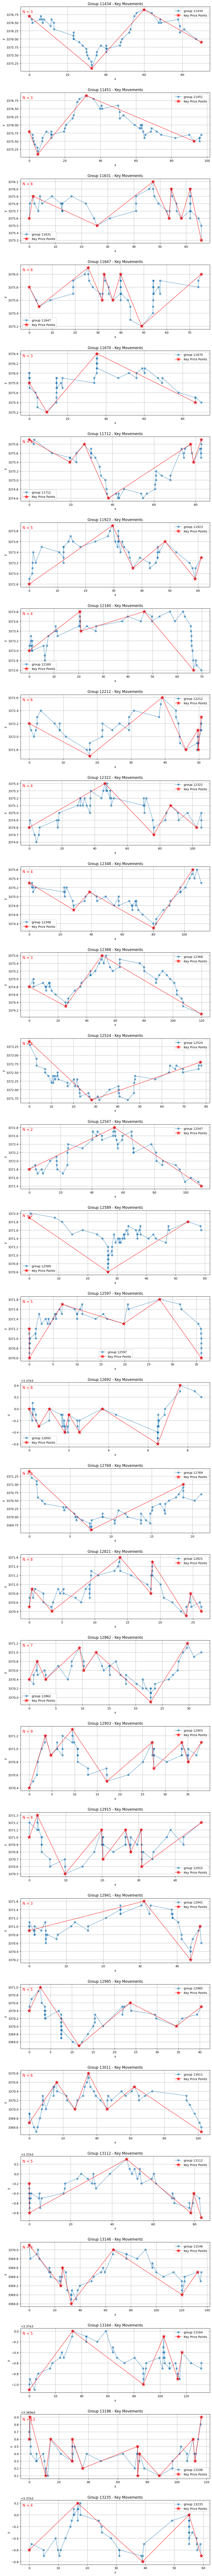

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv("sample.csv", encoding="utf-8")
groups = df["group"].unique()

# 参数设置
percent = 0.3
tick_size = 0.1

# 筛选关键价格变动点
def filter_price_movements(df, percent, tick_size):
    height = df.y.max() - df.y.min()
    
    change_pips = height * percent/tick_size
    print(change_pips)
    ChangePips = change_pips * tick_size

    df = df.sort_values("x").reset_index(drop=True)
    PriceList = []
    TimeList = []

    for i in range(len(df)):
        price = df.loc[i, "y"]
        time = df.loc[i, "x"]

        if len(PriceList) == 0:
            PriceList.append(price)
            TimeList.append(time)
        elif len(PriceList) == 1:
            if abs(price - PriceList[-1]) > ChangePips:
                PriceList.append(price)
                TimeList.append(time)
        else:
            last_diff = PriceList[-1] - PriceList[-2]
            new_diff = price - PriceList[-1]

            if last_diff * new_diff > 0:  # 同方向变化
                PriceList[-1] = price
                TimeList[-1] = time
            elif abs(new_diff) > ChangePips:
                PriceList.append(price)
                TimeList.append(time)

    return pd.DataFrame({"x": TimeList, "y": PriceList})

# 绘图
fig, axes = plt.subplots(len(groups), 1, figsize=(10, 4 * len(groups)), dpi=100)
if len(groups) == 1:
    axes = [axes]

for ax, group_id in zip(axes, groups):
    group_df = df[df["group"] == group_id].sort_values("x")
    group_filtered_df = filter_price_movements(group_df, percent, tick_size)

    # 原始价格线
    ax.plot(group_df["x"], group_df["y"], "o-", alpha=0.6, label=f"group {group_id}")

    # 关键价格点标注
    if not group_filtered_df.empty:
        ax.plot(group_filtered_df["x"], group_filtered_df["y"], "r*-", markersize=12, label="Key Price Points", alpha=0.7)

        # 添加关键点数量标记
        point_count = len(group_filtered_df)
        ax.text(0.01, 0.95, f"N = {point_count-1}", transform=ax.transAxes,
                fontsize=12, verticalalignment='top', color='red')


    ax.set_title(f"Group {group_id} - Key Movements")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(True)

plt.tight_layout(h_pad=2.5)
plt.show()


In [7]:
df[df.group==11434].y.max()

np.float64(3376.9)

In [3]:
df

x       y  group
0     0.000  3376.7  11434
1     1.332  3376.6  11434
2     1.676  3376.5  11434
3     5.504  3376.6  11434
4     6.028  3376.7  11434
..      ...     ...    ...
445  50.648  3372.2  12212
446  50.652  3372.1  12212
447  50.660  3372.2  12212
448  50.664  3372.1  12212
449  50.700  3372.3  12212

[450 rows x 3 columns]

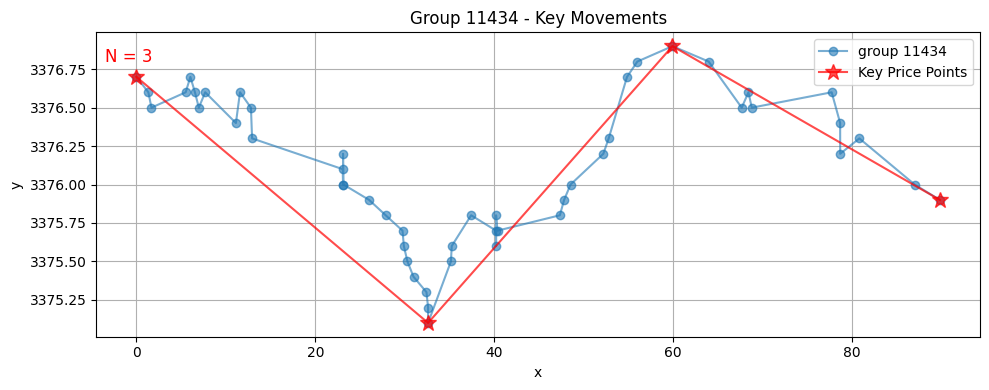

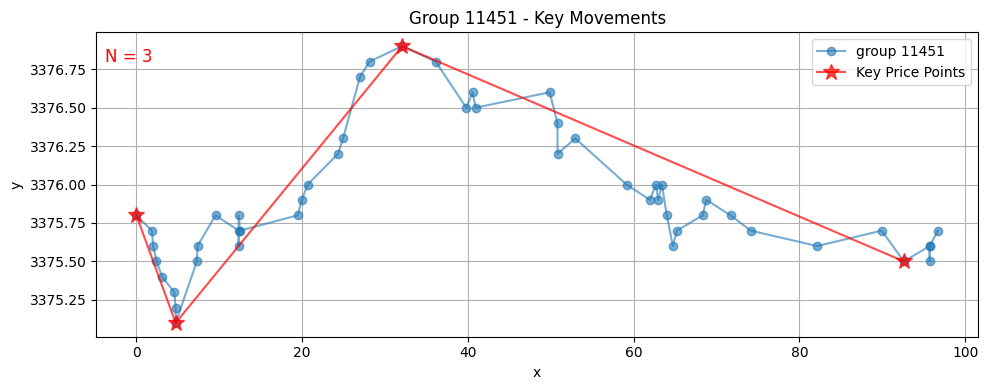

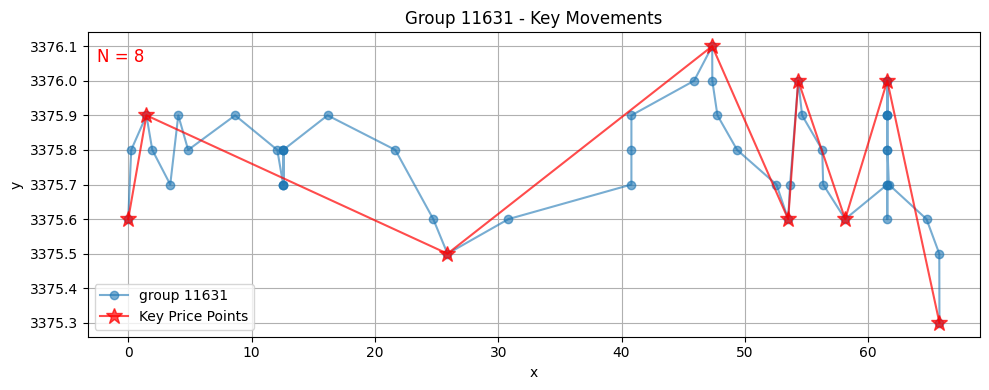

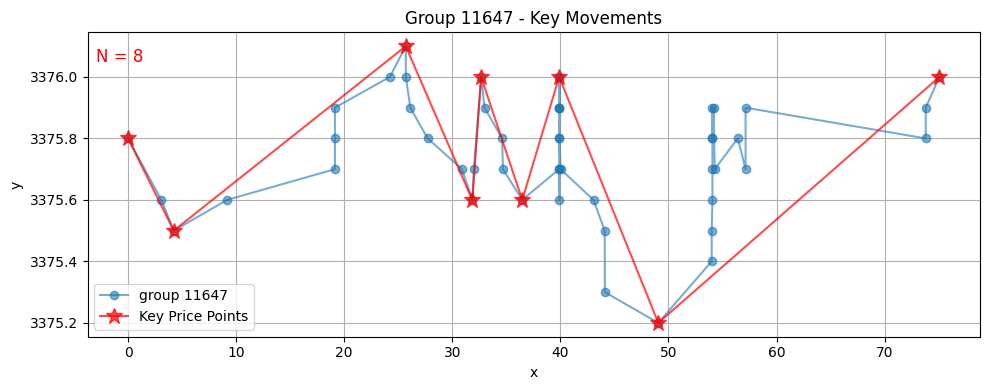

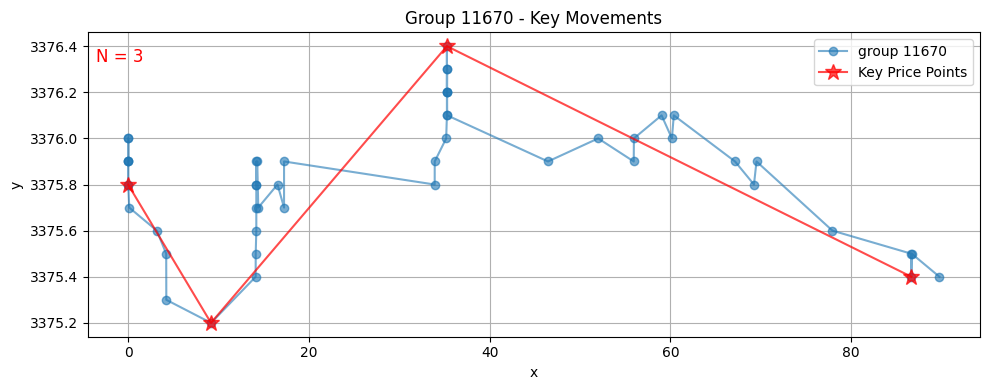

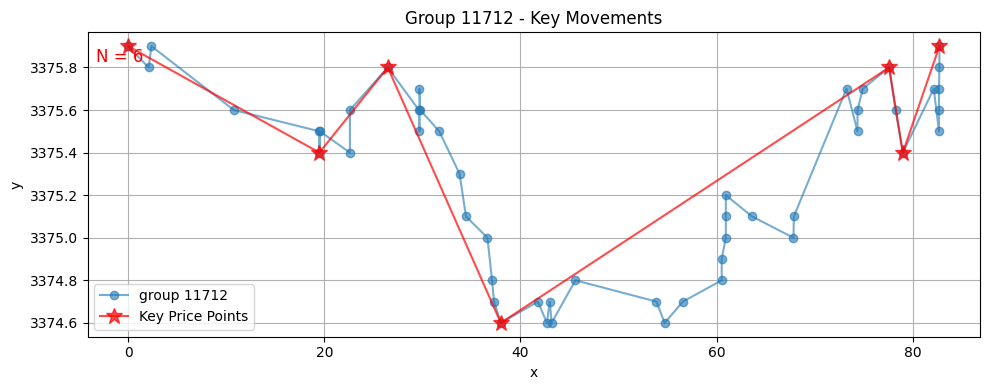

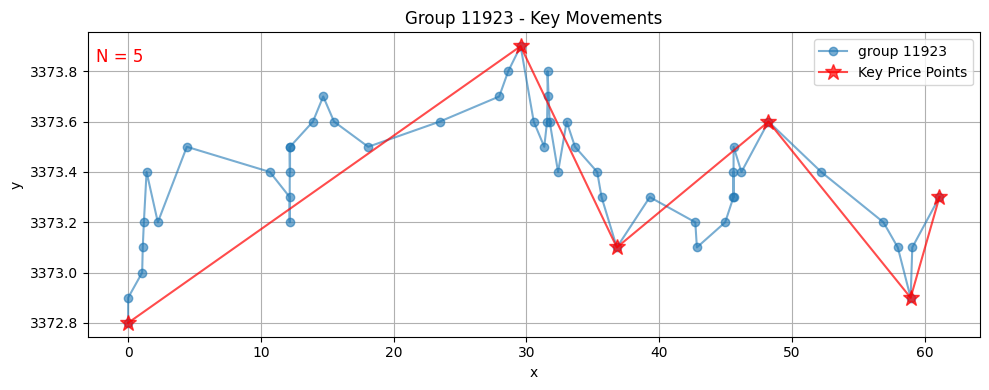

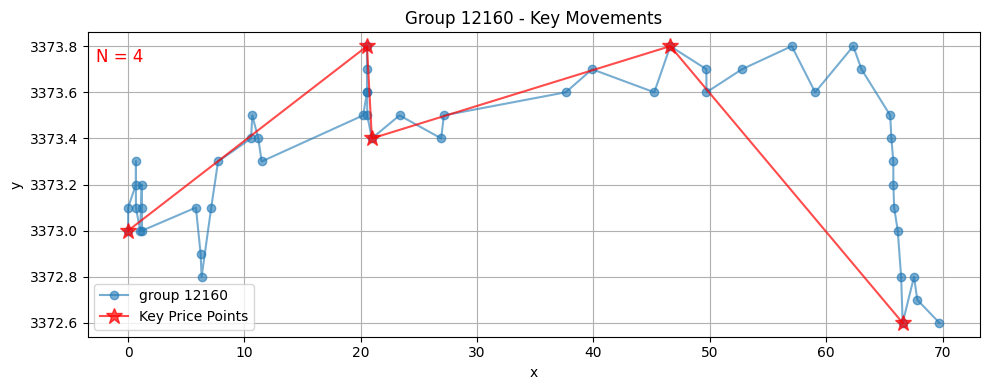

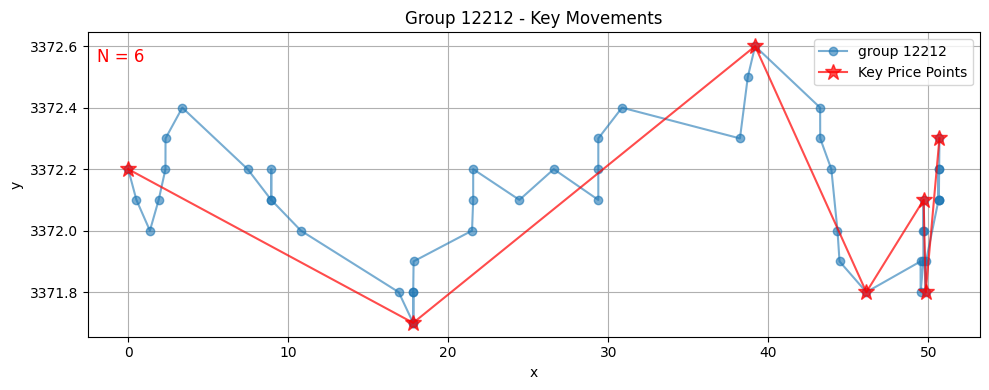

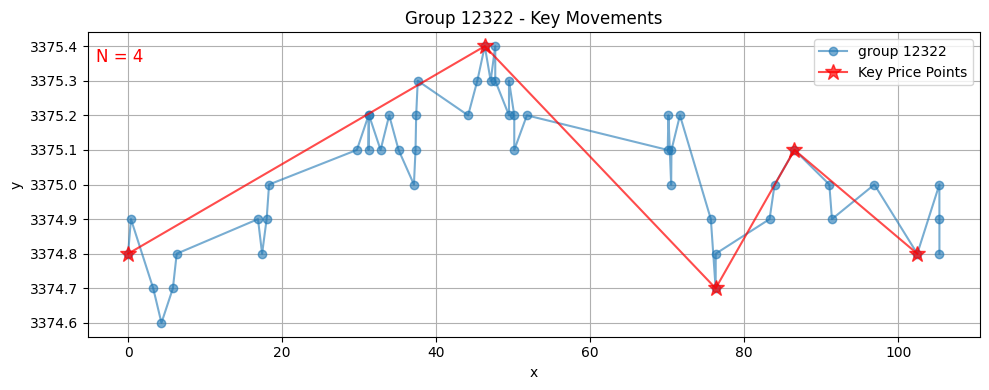

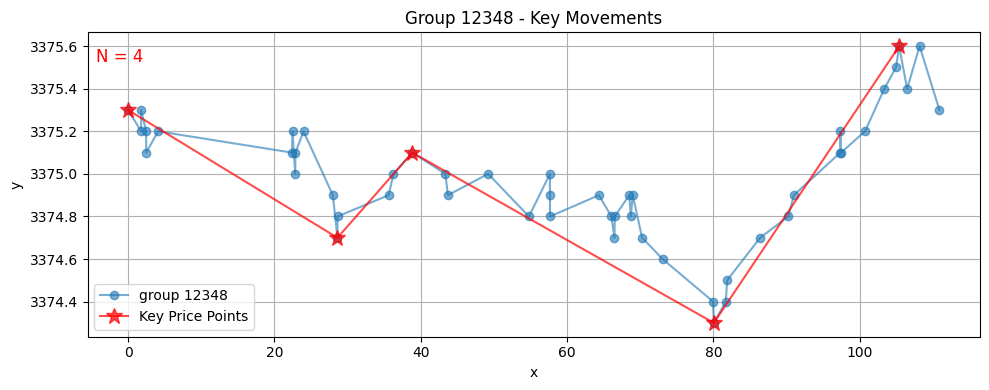

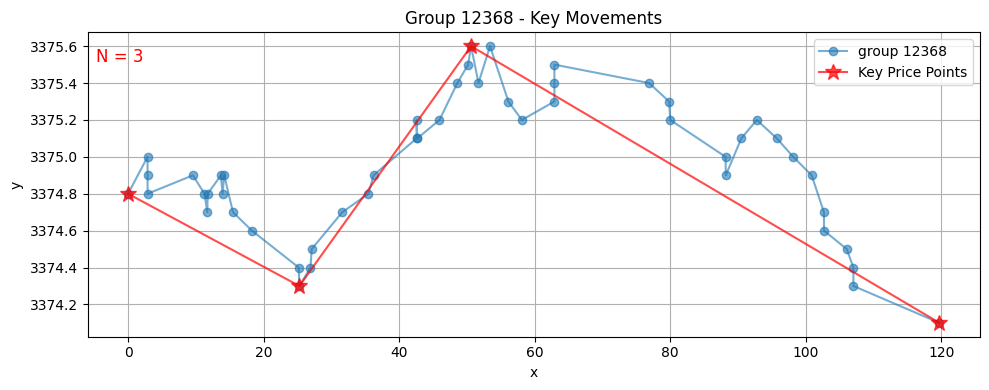

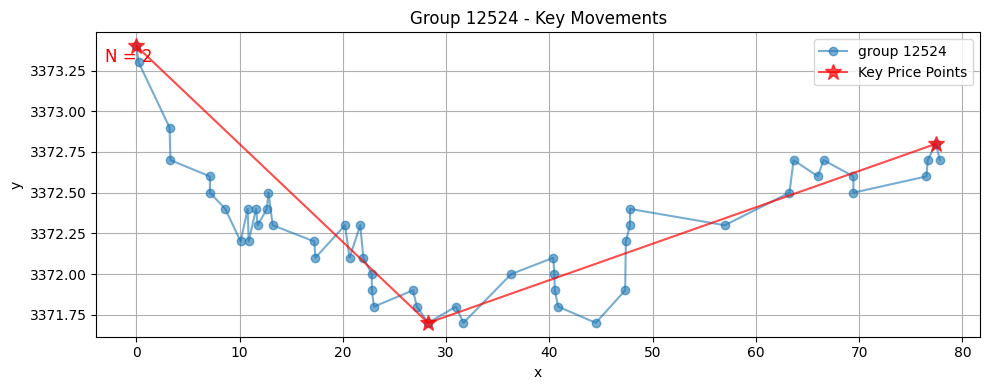

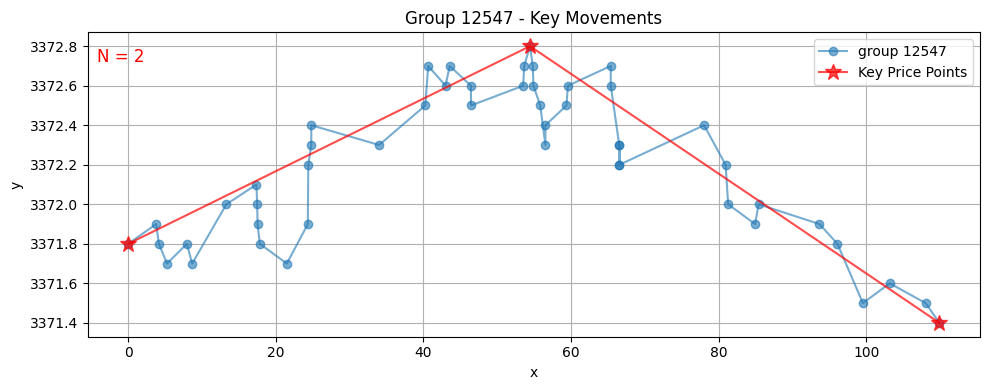

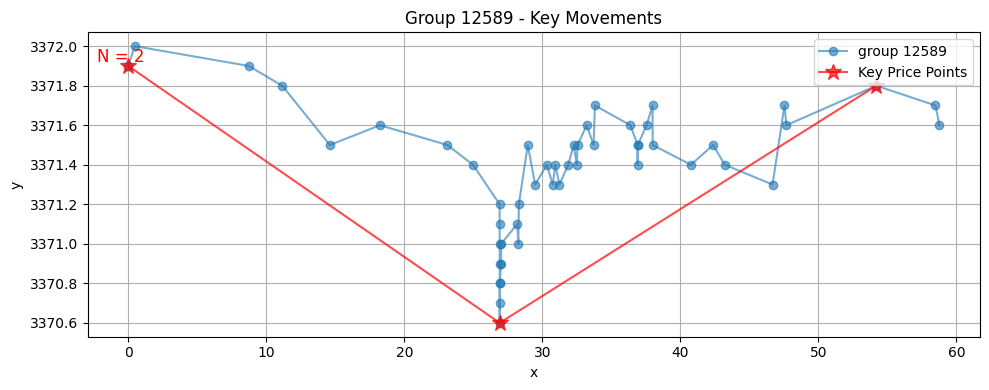

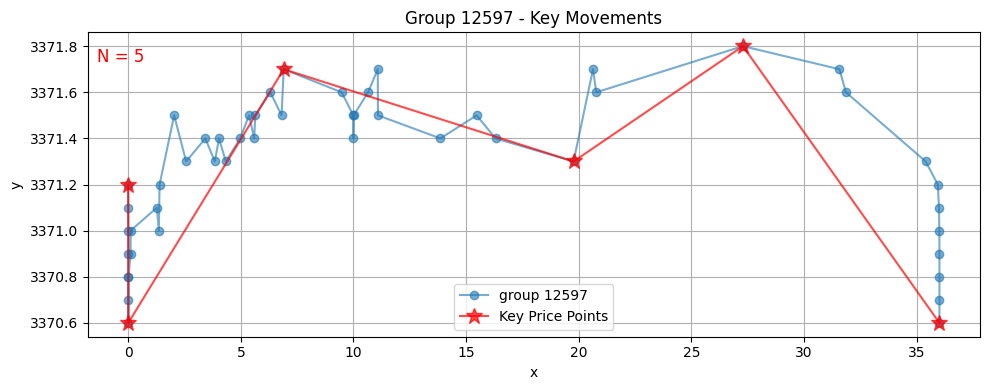

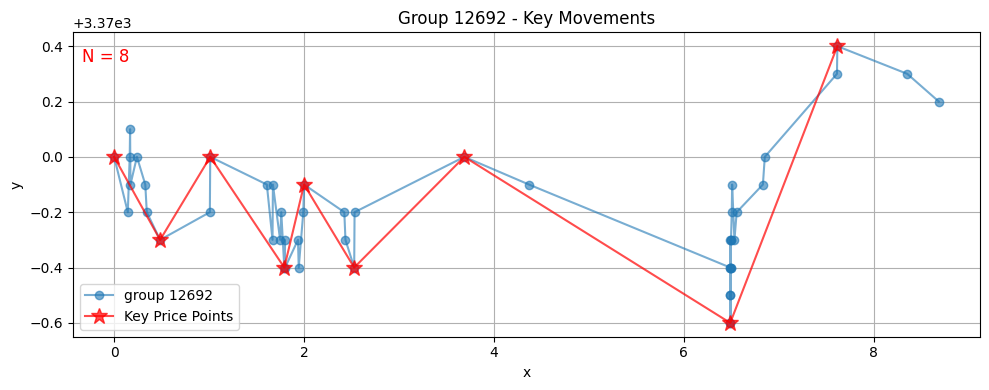

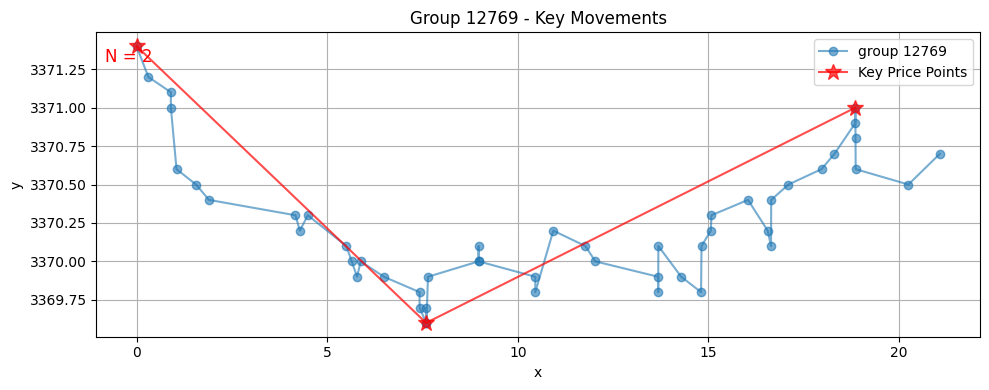

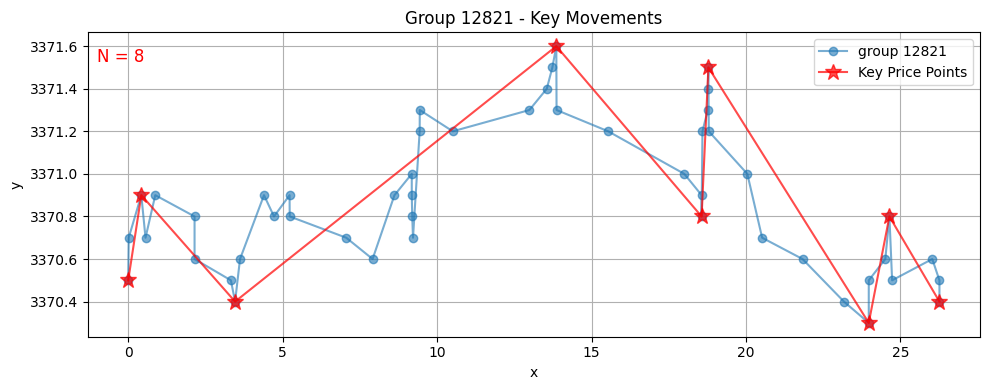

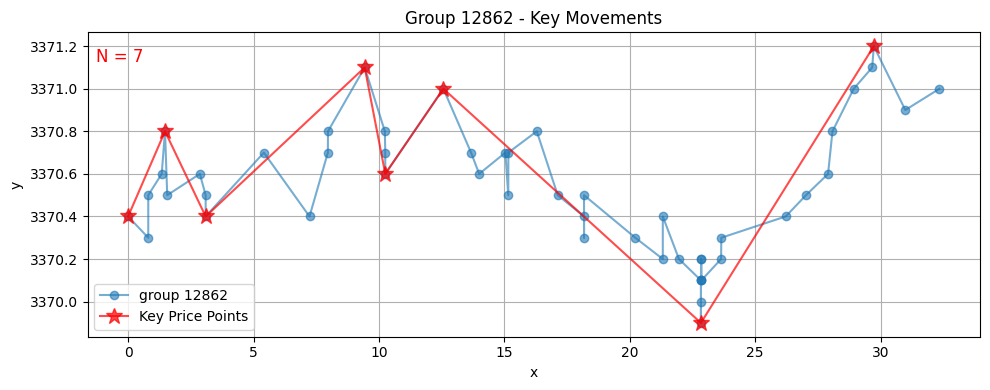

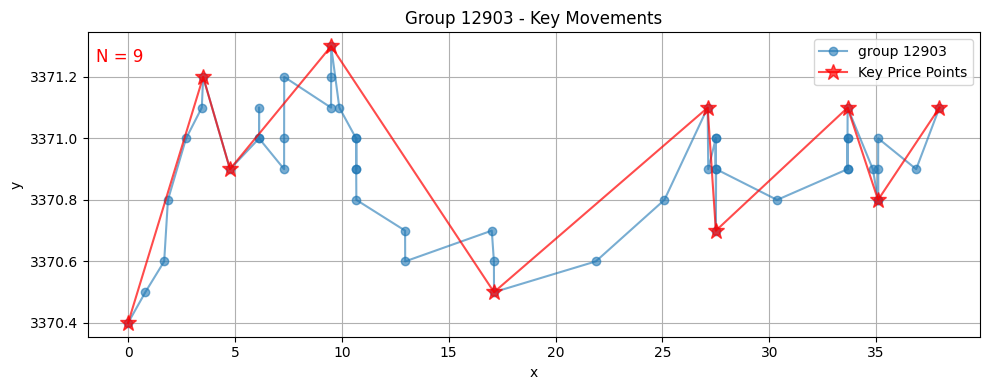

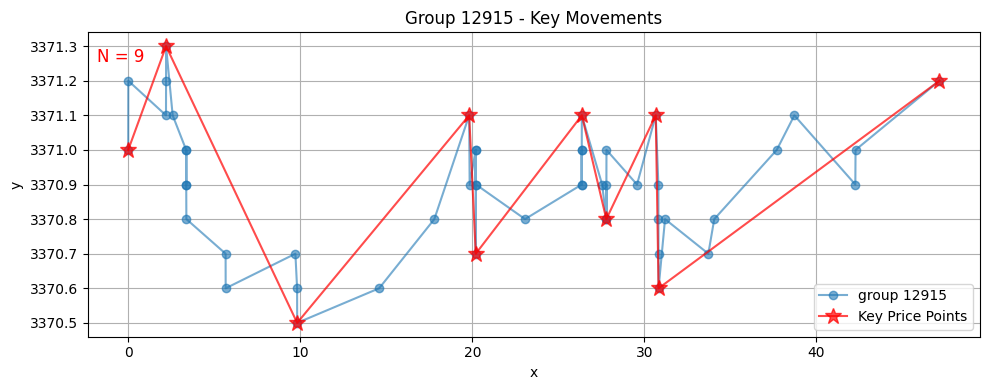

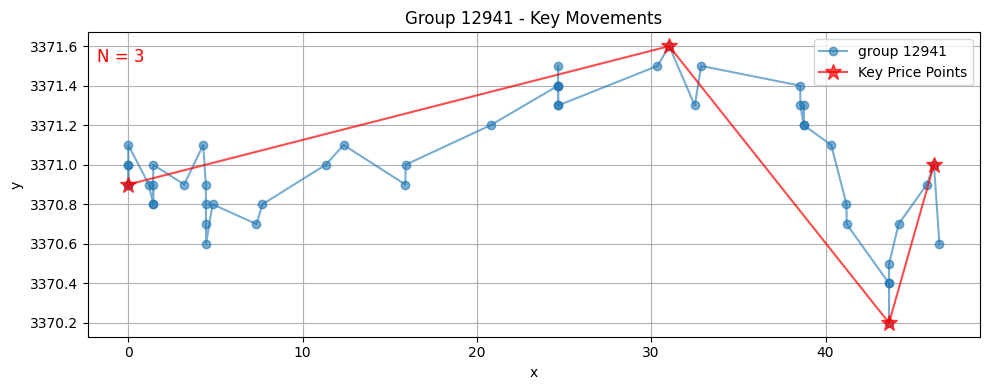

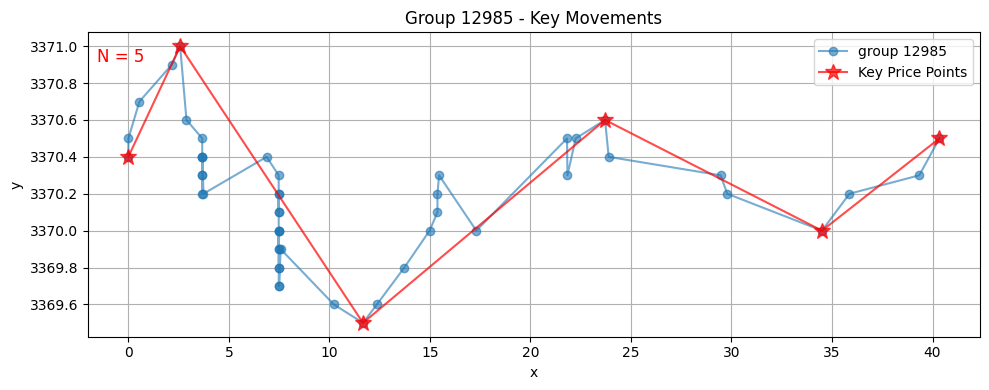

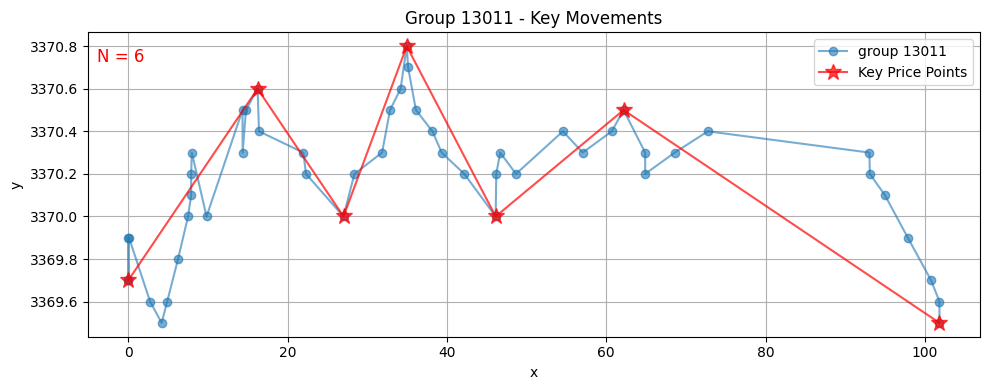

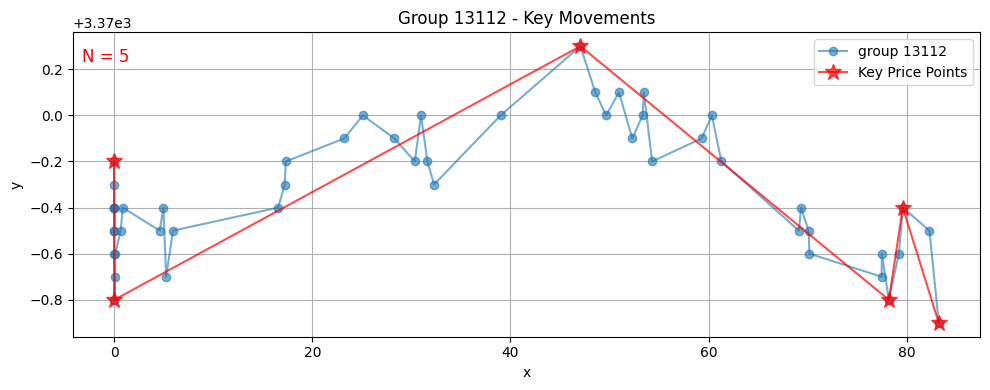

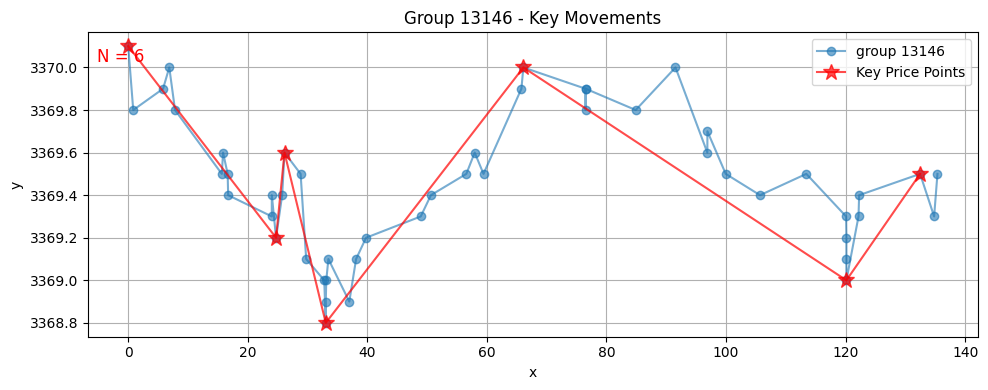

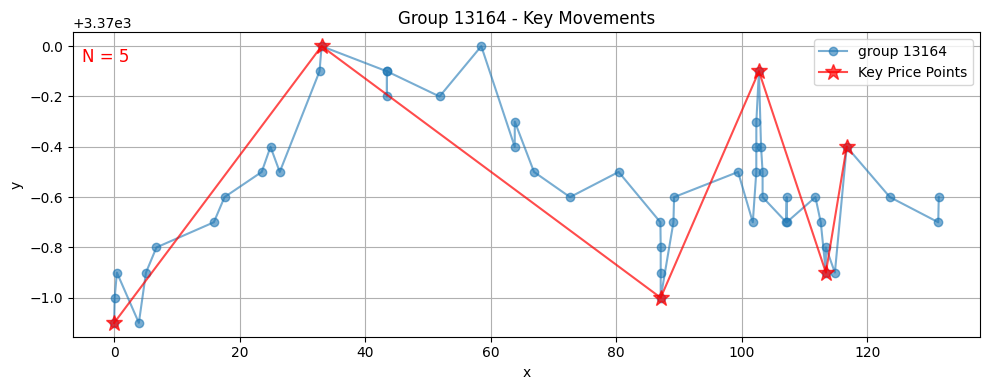

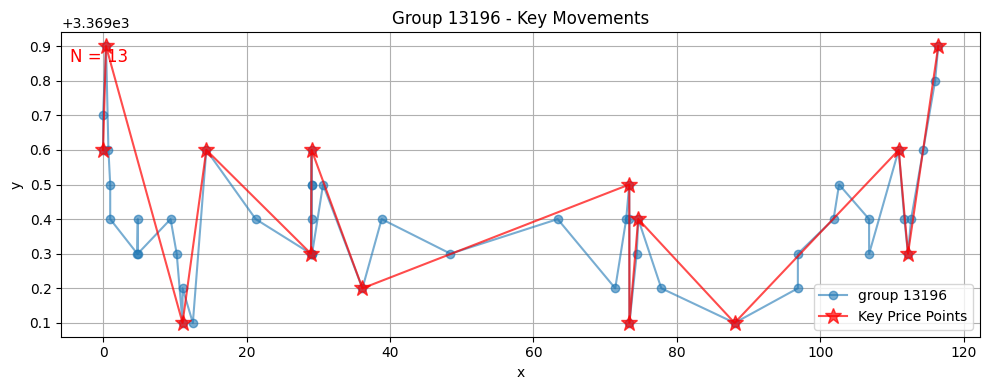

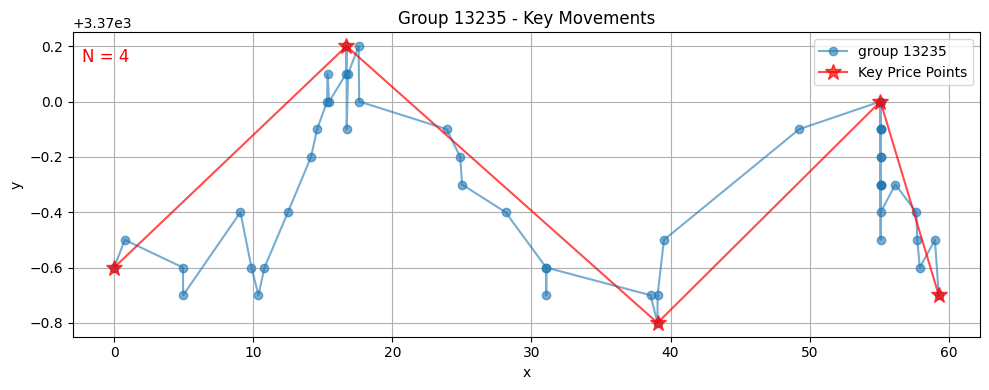

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv("sample.csv", encoding="utf-8")
groups = df["group"].unique()

# 参数设置
percent = 0.3
tick_size = 0.1

# 筛选关键价格变动点
def filter_price_movements(df, percent, tick_size):
    height = df.y.max() - df.y.min()
    
    change_pips = height * percent / tick_size
    ChangePips = change_pips * tick_size

    df = df.sort_values("x").reset_index(drop=True)
    PriceList = []
    TimeList = []

    for i in range(len(df)):
        price = df.loc[i, "y"]
        time = df.loc[i, "x"]

        if len(PriceList) == 0:
            PriceList.append(price)
            TimeList.append(time)
        elif len(PriceList) == 1:
            if abs(price - PriceList[-1]) > ChangePips:
                PriceList.append(price)
                TimeList.append(time)
        else:
            last_diff = PriceList[-1] - PriceList[-2]
            new_diff = price - PriceList[-1]

            if last_diff * new_diff > 0:  # 同方向变化
                PriceList[-1] = price
                TimeList[-1] = time
            elif abs(new_diff) > ChangePips:
                PriceList.append(price)
                TimeList.append(time)

    return pd.DataFrame({"x": TimeList, "y": PriceList})


# 为每个 group 单独画图
for group_id in groups:
    group_df = df[df["group"] == group_id].sort_values("x")
    group_filtered_df = filter_price_movements(group_df, percent, tick_size)

    # 单独创建图和坐标轴
    plt.figure(figsize=(10, 4), dpi=100)
    plt.plot(group_df["x"], group_df["y"], "o-", alpha=0.6, label=f"group {group_id}")

    if not group_filtered_df.empty:
        plt.plot(group_filtered_df["x"], group_filtered_df["y"], "r*-", markersize=12, label="Key Price Points", alpha=0.7)

        # 添加关键点数量标记
        point_count = len(group_filtered_df)
        plt.text(0.01, 0.95, f"N = {point_count - 1}", transform=plt.gca().transAxes,
                 fontsize=12, verticalalignment='top', color='red')

    plt.title(f"Group {group_id} - Key Movements")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
